In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb 

In [2]:
hospital_data=pd.read_csv('hospital_data.csv')

In [3]:
hospital_data.head(5)

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,patientid,City_Code_Patient,Type of Admission,Illness_Severity,Patient_Visitors,Age,Admission_Deposit,Stay_Days
0,1,8,2,3,2,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [4]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital                           318438 non-null  int64  
 2   Hospital_type                      318438 non-null  int64  
 3   Hospital_city                      318438 non-null  int64  
 4   Hospital_region                    318438 non-null  int64  
 5   Available_Extra_Rooms_in_Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility                      318438 non-null  object 
 9   Bed_Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

In [5]:
hospital_data.drop(['patientid','City_Code_Patient','Patient_Visitors','Admission_Deposit'],axis=1,inplace=True)

In [6]:
hospital_data.isnull().sum()

case_id                                0
Hospital                               0
Hospital_type                          0
Hospital_city                          0
Hospital_region                        0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility                          0
Bed_Grade                            113
Type of Admission                      0
Illness_Severity                       0
Age                                    0
Stay_Days                              0
dtype: int64

In [7]:
hospital_data.isnull().sum()

case_id                                0
Hospital                               0
Hospital_type                          0
Hospital_city                          0
Hospital_region                        0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility                          0
Bed_Grade                            113
Type of Admission                      0
Illness_Severity                       0
Age                                    0
Stay_Days                              0
dtype: int64

In [8]:
hospital_data['Bed_Grade'].unique()

array([ 2.,  3.,  4.,  1., nan])

In [9]:
hospital_data['Bed_Grade'].fillna(hospital_data['Bed_Grade'].median(),inplace=True)

In [10]:
hospital_data.isnull().sum()

case_id                              0
Hospital                             0
Hospital_type                        0
Hospital_city                        0
Hospital_region                      0
Available_Extra_Rooms_in_Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility                        0
Bed_Grade                            0
Type of Admission                    0
Illness_Severity                     0
Age                                  0
Stay_Days                            0
dtype: int64

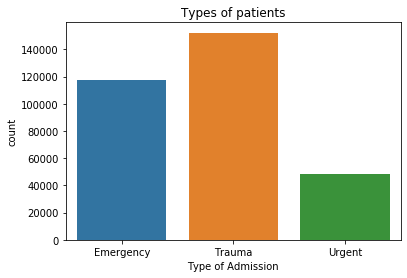

In [11]:
sns.countplot(hospital_data['Type of Admission'])
plt.title('Types of patients')
plt.show()

In [12]:
def age(data):
    data[['Age_start','Age_end']] = data.Age.str.split(expand=True,pat='-')
    data['Age']=np.floor((data['Age_start'].astype(int)+data['Age_end'].astype(int))/2)
    data.drop(['Age_start','Age_end'],axis=1,inplace=True)
        
    
    return data

In [13]:
hospital_data=age(hospital_data)

In [14]:
def stay(data):
    data['Stay_Days']=np.where(    
    data['Stay_Days']=='More than 100 Days',
    '100-120',data['Stay_Days'])

    data[['start','end']] = data.Stay_Days.str.split(expand=True,pat='-')
    data['Stay_Days']=np.floor((data['start'].astype(int)+data['end'].astype(int))/2)
    data.drop(['start','end'],axis=1,inplace=True)
    
    return data
    

In [15]:
hospital_data=stay(hospital_data)

In [16]:
hospital_data['Stay_Days'].unique()

array([  5.,  45.,  35.,  15.,  55.,  25.,  75., 110.,  85.,  65.,  95.])

In [17]:
hospital_data['Department']=hospital_data['Department'].map({'radiotherapy':0,'anesthesia':1,'gynecology':2,'TB & Chest disease':3,'surgery':4})
hospital_data['Illness_Severity'] = hospital_data['Illness_Severity'].map({'Extreme':0,'Moderate':1,'Minor':2})
hospital_data['Type of Admission'] = hospital_data['Type of Admission'].map({'Emergency':0,'Trauma':1,'Urgent':2})
hospital_data['Ward_Facility']= hospital_data['Ward_Facility'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5})
hospital_data['Ward_Type']= hospital_data['Ward_Type'].map({'P':0,'Q':1,'R':2,'S':3,'T':4,'U':5})

In [18]:
hospital_data.head()

,case_id,Hospital,Hospital_type,Hospital_city,Hospital_region,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility,Bed_Grade,Type of Admission,Illness_Severity,Age,Stay_Days
0,1,8,2,3,2,3,0,2,5,2.0,0,0,55.0,5.0
1,2,2,2,5,2,2,0,3,5,2.0,1,0,55.0,45.0
2,3,10,4,1,0,2,1,3,4,2.0,1,0,55.0,35.0
3,4,26,1,2,1,2,0,2,3,2.0,1,0,55.0,45.0
4,5,26,1,2,1,2,0,3,3,2.0,1,0,55.0,45.0


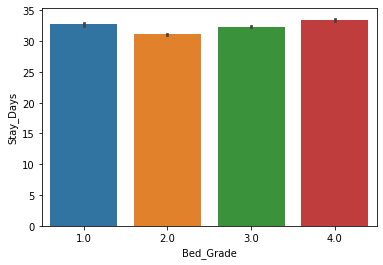

In [19]:
sns.barplot(x='Bed_Grade',y='Stay_Days',data=hospital_data)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X = hospital_data.drop(['Stay_Days'],axis = 1)
y = hospital_data['Stay_Days']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

In [23]:
X_train.shape

(191062, 13)

In [24]:
X_test.shape

(127376, 13)

In [25]:
y_train.shape

(191062,)

In [26]:
y_test.shape

(127376,)

In [27]:
model = lgb.LGBMClassifier( random_state=0)
model.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
pred = model.predict(X_test)

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 15.285218565506845
MSE: 569.8357618389649
RMSE: 23.871232935040556


In [31]:
error=pd.DataFrame(np.array(y_test).flatten(),columns=['actual'])
error['prediction']=np.array(pred)
error.head(20)

,actual,prediction
0,25.0,55.0
1,95.0,25.0
2,15.0,25.0
3,15.0,15.0
4,25.0,25.0
5,35.0,15.0
6,35.0,15.0
7,5.0,15.0
8,15.0,15.0
9,5.0,25.0
